<a href="https://colab.research.google.com/github/radhakrishnan-omotec/football_predict/blob/main/Aditya_Raunaq_Project_Final_Football_player_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football-player-price-prediction

In [ ]:
!git clone https://github.com/radhakrishnan-omotec/football_predict.git

fatal: destination path 'football_predict' already exists and is not an empty directory.


## To train the models

## To deploy the model

It is the Random Forest according to our implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
import json
import pickle

In [ ]:
df = pd.read_csv('/content/football_predict/football.csv')

In [ ]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
df.tail()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,0.10%,12,4.0,Senegal,0,3,20,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,461.0,26.804772,3.961892,17.00,24.0,27.0,30.0,38.0
position_cat,461.0,2.180043,1.000061,1.00,1.0,2.0,3.0,4.0
market_value,461.0,11.012039,12.257403,0.05,3.0,7.0,15.0,75.0
page_views,461.0,763.776573,931.805757,3.00,220.0,460.0,896.0,7664.0
fpl_value,461.0,5.447939,1.346695,4.00,4.5,5.0,5.5,12.5
fpl_points,461.0,57.314534,53.113811,0.00,5.0,51.0,94.0,264.0
region,460.0,1.993478,0.957689,1.00,1.0,2.0,2.0,4.0
new_foreign,461.0,0.034707,0.183236,0.00,0.0,0.0,0.0,1.0
age_cat,461.0,3.206074,1.279795,1.00,2.0,3.0,4.0,6.0
club_id,461.0,10.334056,5.726475,1.00,6.0,10.0,15.0,20.0


In [ ]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


 ## Step 1 : Training and testing the dataset

In [ ]:
train_df, test_df = train_test_split(df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 123 to 432
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          345 non-null    object 
 1   club          345 non-null    object 
 2   age           345 non-null    int64  
 3   position      345 non-null    object 
 4   position_cat  345 non-null    int64  
 5   market_value  345 non-null    float64
 6   page_views    345 non-null    int64  
 7   fpl_value     345 non-null    float64
 8   fpl_sel       345 non-null    object 
 9   fpl_points    345 non-null    int64  
 10  region        344 non-null    float64
 11  nationality   345 non-null    object 
 12  new_foreign   345 non-null    int64  
 13  age_cat       345 non-null    int64  
 14  club_id       345 non-null    int64  
 15  big_club      345 non-null    int64  
 16  new_signing   345 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 48.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 18 to 349
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          116 non-null    object 
 1   club          116 non-null    object 
 2   age           116 non-null    int64  
 3   position      116 non-null    object 
 4   position_cat  116 non-null    int64  
 5   market_value  116 non-null    float64
 6   page_views    116 non-null    int64  
 7   fpl_value     116 non-null    float64
 8   fpl_sel       116 non-null    object 
 9   fpl_points    116 non-null    int64  
 10  region        116 non-null    float64
 11  nationality   116 non-null    object 
 12  new_foreign   116 non-null    int64  
 13  age_cat       116 non-null    int64  
 14  club_id       116 non-null    int64  
 15  big_club      116 non-null    int64  
 16  new_signing   116 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 16.3+ KB


In [ ]:
test_df.to_csv('/content/football_predict/test_df.csv', index=False)

In [ ]:
train_df.to_csv('/content/football_predict/train_df.csv', index=False)

## Step 2 : Pre-processing the dataset

In [ ]:
# Remove % sign from fpl_sel and convert to float
train_df.fpl_sel = train_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [ ]:
train_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
123,Damien Delaney,Crystal+Palace,36,CB,3,1.0,195,4.5,0.6,51,2.0,Ireland,0,6,6,0,0
119,Yohan Cabaye,Crystal+Palace,31,CM,2,15.0,456,5.5,1.4,91,2.0,France,0,4,6,0,0
267,Ander Herrera,Manchester+United,27,CM,2,30.0,1603,5.5,7.7,97,2.0,Spain,0,3,12,1,0
179,Harry Bunn,Huddersfield,24,LW,1,0.5,85,4.5,0.1,0,1.0,England,0,2,8,0,0
390,Moussa Sissokho,Tottenham,27,CM,2,20.0,1162,5.5,0.3,43,2.0,France,0,3,17,1,1


In [ ]:
# Remove % sign from fpl_sel and convert to float
test_df.fpl_sel = test_df.fpl_sel.apply(lambda x : float(x[:-1]))

In [ ]:
test_df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
18,Danny Welbeck,Arsenal,26,CF,1,15.0,1521,7.5,0.5,37,1.0,England,0,3,1,1,0
415,Mauro Zarate,Watford,30,SS,1,2.0,473,5.5,0.0,8,3.0,Argentina,0,4,18,0,0
136,Ashley Williams,Everton,32,CB,3,8.0,599,5.5,4.7,127,2.0,Wales,0,5,7,0,1
355,Alfie Mawson,Swansea,23,CB,3,6.0,509,5.0,1.8,94,1.0,England,0,2,16,0,1
393,Michel Vorm,Tottenham,33,GK,4,4.0,252,5.0,0.1,17,2.0,Netherlands,0,5,17,1,0


In [ ]:
train_df = train_df.dropna()
train_df.shape

(344, 17)

In [ ]:
test_df = test_df.dropna()
test_df.shape

(116, 17)

## Data Visualization:
### A. HEAT MAP

<ipython-input-21-9150eb4bafe6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, linewidth = 0.02, cmap="flare")


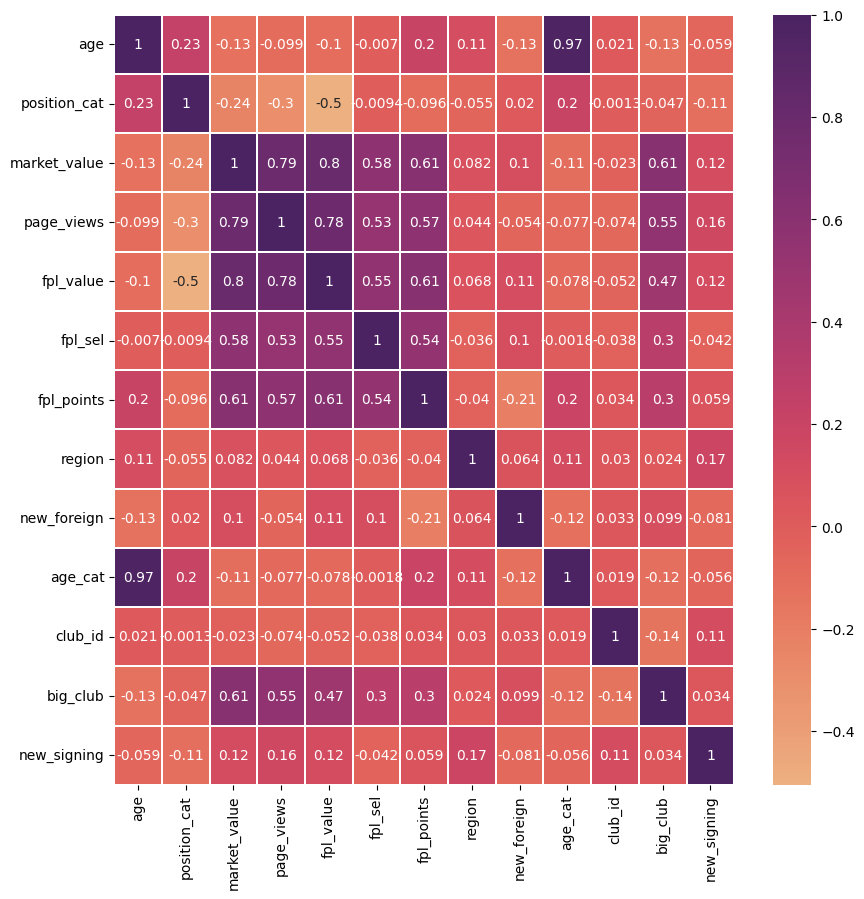

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, linewidth = 0.02, cmap="flare")
plt.show()

#### Either use age or age_cat. They are highly correlated

#### Also, fpl_value, page_views are important for market_value

In [ ]:
removed_df = train_df.drop(['name','club','age_cat','position'], axis=1)

In [ ]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 123 to 432
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           344 non-null    int64  
 1   position_cat  344 non-null    int64  
 2   market_value  344 non-null    float64
 3   page_views    344 non-null    int64  
 4   fpl_value     344 non-null    float64
 5   fpl_sel       344 non-null    float64
 6   fpl_points    344 non-null    int64  
 7   region        344 non-null    float64
 8   nationality   344 non-null    object 
 9   new_foreign   344 non-null    int64  
 10  club_id       344 non-null    int64  
 11  big_club      344 non-null    int64  
 12  new_signing   344 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 37.6+ KB


In [ ]:
removed_df.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,club_id,big_club,new_signing
123,36,3,1.0,195,4.5,0.6,51,2.0,Ireland,0,6,0,0
119,31,2,15.0,456,5.5,1.4,91,2.0,France,0,6,0,0
267,27,2,30.0,1603,5.5,7.7,97,2.0,Spain,0,12,1,0
179,24,1,0.5,85,4.5,0.1,0,1.0,England,0,8,0,0
390,27,2,20.0,1162,5.5,0.3,43,2.0,France,0,17,1,1


## B. PAIR PLOT

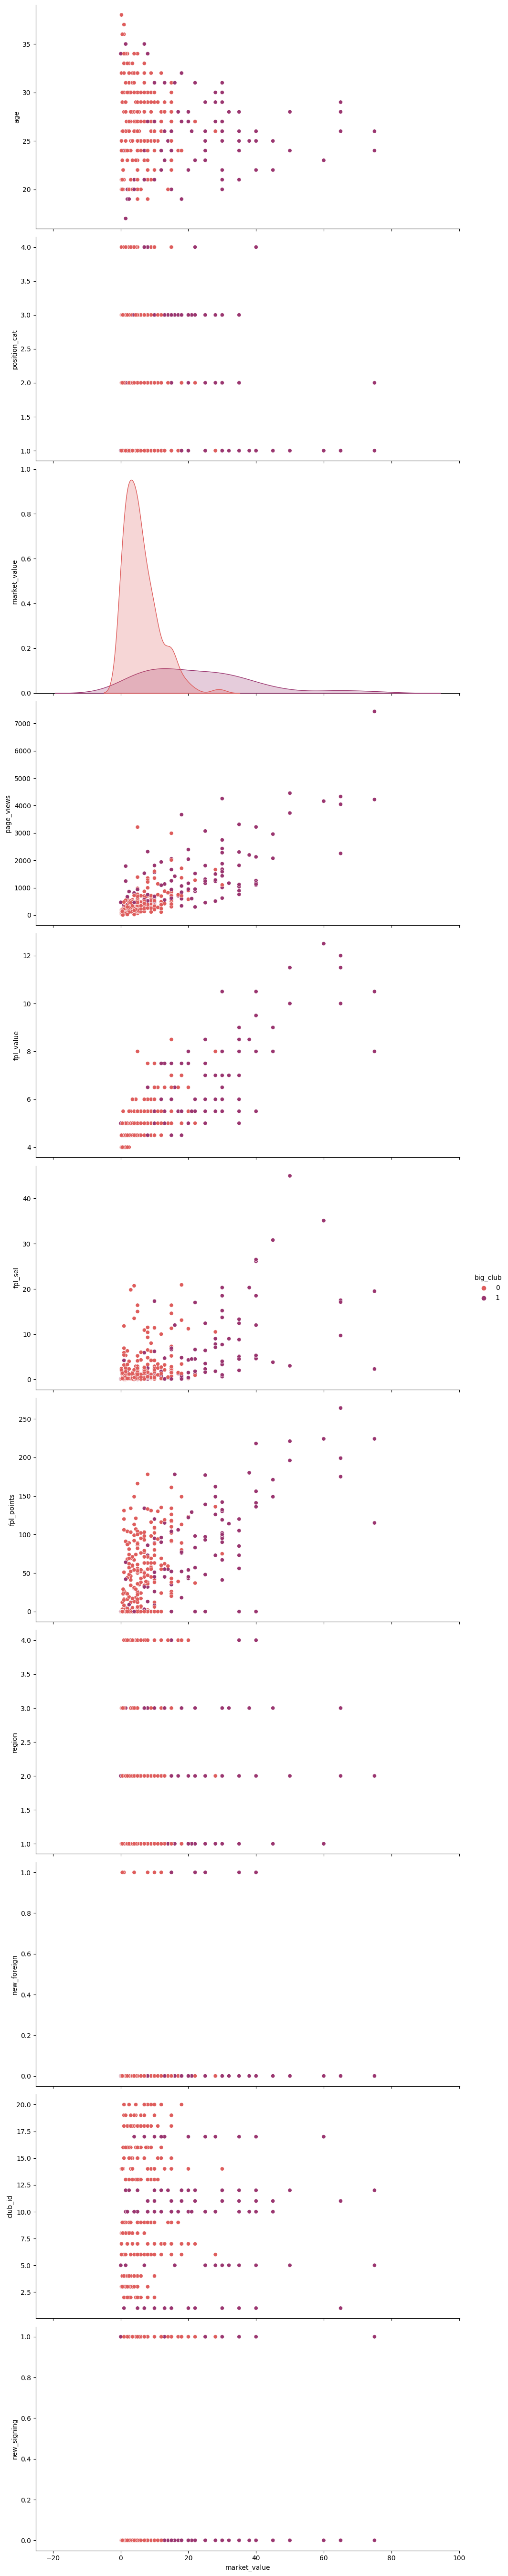

In [ ]:
sns.pairplot(removed_df, x_vars='market_value', hue = 'big_club', height = 5, aspect = 2 , palette='flare')

The continuous variables are nicely correlated with the market value. Mostly linear

Those who belong to big club have higher market value

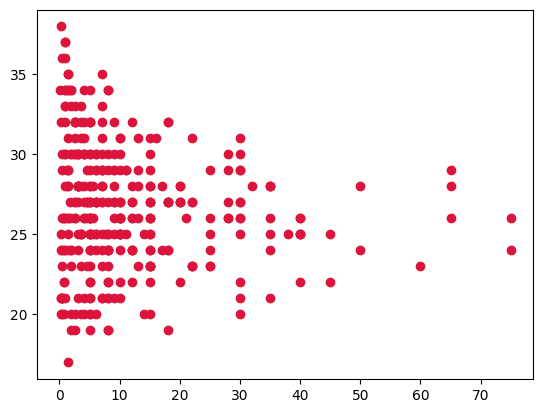

In [ ]:
plt.scatter(removed_df.market_value, removed_df.age , c ='crimson')

Interestingly, it looks like a normal distribution.

Players aged around 25 have higher market value

**Binning might help**

* I'll bring back the age_cat attribute and move further with that one

In [ ]:
removed_df = pd.concat([removed_df.drop('age', axis=1), df.age_cat], axis=1)

In [ ]:
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 123 to 456
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position_cat  344 non-null    float64
 1   market_value  344 non-null    float64
 2   page_views    344 non-null    float64
 3   fpl_value     344 non-null    float64
 4   fpl_sel       344 non-null    float64
 5   fpl_points    344 non-null    float64
 6   region        344 non-null    float64
 7   nationality   344 non-null    object 
 8   new_foreign   344 non-null    float64
 9   club_id       344 non-null    float64
 10  big_club      344 non-null    float64
 11  new_signing   344 non-null    float64
 12  age_cat       461 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 50.4+ KB


In [ ]:
all_columns = removed_df.columns
category_cols = ['position_cat', 'region', 'nationality', 'new_foreign', 'club_id', 'big_club', 'new_signing', 'age_cat']

In [ ]:
all_columns

Index(['position_cat', 'market_value', 'page_views', 'fpl_value', 'fpl_sel',
       'fpl_points', 'region', 'nationality', 'new_foreign', 'club_id',
       'big_club', 'new_signing', 'age_cat'],
      dtype='object')

In [ ]:
final_df = removed_df.copy()
final_df.reset_index(drop=True, inplace=True)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position_cat  344 non-null    float64
 1   market_value  344 non-null    float64
 2   page_views    344 non-null    float64
 3   fpl_value     344 non-null    float64
 4   fpl_sel       344 non-null    float64
 5   fpl_points    344 non-null    float64
 6   region        344 non-null    float64
 7   nationality   344 non-null    object 
 8   new_foreign   344 non-null    float64
 9   club_id       344 non-null    float64
 10  big_club      344 non-null    float64
 11  new_signing   344 non-null    float64
 12  age_cat       461 non-null    int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 46.9+ KB


In [ ]:
column_dict = {i:[] for i in category_cols}
for i in category_cols:
    temp = pd.get_dummies(final_df[i], prefix=i)
    column_dict[i].extend(temp.columns)
    others = pd.Series(np.zeros(final_df.shape[0]), name=i+'_others')
    temp = pd.concat([temp, others], axis=1)
    final_df = pd.concat([final_df.drop(i, axis=1), temp], axis=1)

In [ ]:
final_df.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'position_cat_1.0', 'position_cat_2.0', 'position_cat_3.0',
       'position_cat_4.0', 'position_cat_others',
       ...
       'new_signing_0.0', 'new_signing_1.0', 'new_signing_others', 'age_cat_1',
       'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5', 'age_cat_6',
       'age_cat_others'],
      dtype='object', length=108)

In [ ]:
all_cat_cols = []
for i in column_dict.keys():
    all_cat_cols.extend(column_dict[i]+[i+'_others'])

all_cat_cols

['position_cat_1.0',
 'position_cat_2.0',
 'position_cat_3.0',
 'position_cat_4.0',
 'position_cat_others',
 'region_1.0',
 'region_2.0',
 'region_3.0',
 'region_4.0',
 'region_others',
 'nationality_Algeria',
 'nationality_Argentina',
 'nationality_Armenia',
 'nationality_Australia',
 'nationality_Austria',
 'nationality_Belgium',
 'nationality_Bosnia',
 'nationality_Brazil',
 'nationality_Cameroon',
 'nationality_Canada',
 'nationality_Chile',
 'nationality_Colombia',
 'nationality_Congo DR',
 "nationality_Cote d'Ivoire",
 'nationality_Croatia',
 'nationality_Czech Republic',
 'nationality_Denmark',
 'nationality_Ecuador',
 'nationality_Egypt',
 'nationality_England',
 'nationality_Finland',
 'nationality_France',
 'nationality_Germany',
 'nationality_Ghana',
 'nationality_Greece',
 'nationality_Iceland',
 'nationality_Ireland',
 'nationality_Israel',
 'nationality_Italy',
 'nationality_Jamaica',
 'nationality_Japan',
 'nationality_Mali',
 'nationality_Netherlands',
 'nationality_New

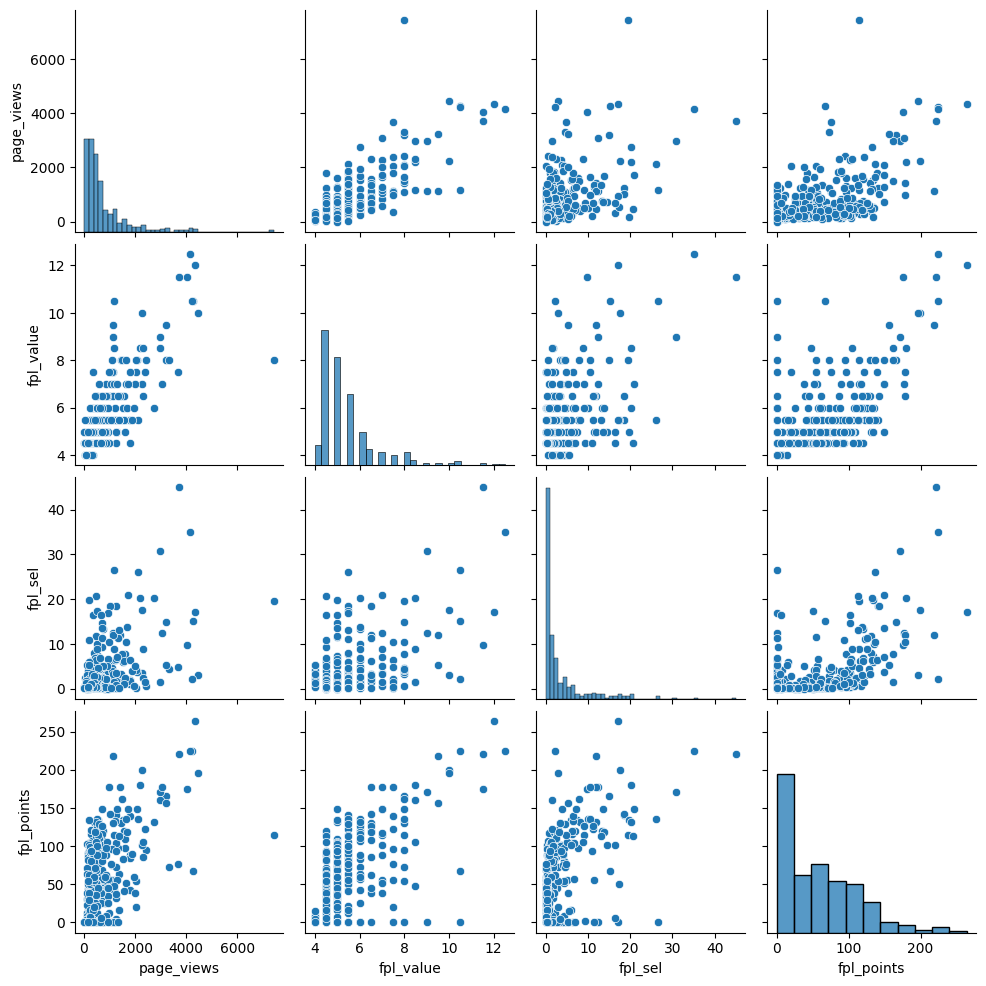

In [ ]:
cont_cols_df = final_df.drop(all_cat_cols+['market_value'], axis = 1)
sns.pairplot(cont_cols_df)

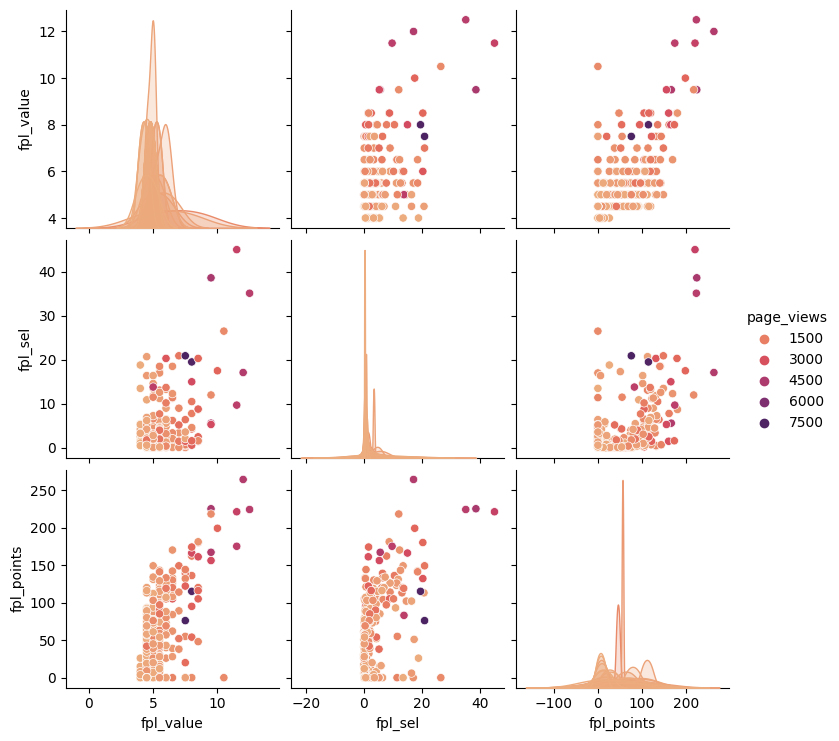

In [ ]:
cont_cols_df = final_df.drop(all_cat_cols+['market_value'], axis = 1)
sns.pairplot(cont_cols_df, hue='page_views', palette='flare')

<hr>

## Take care of skewness by different transform

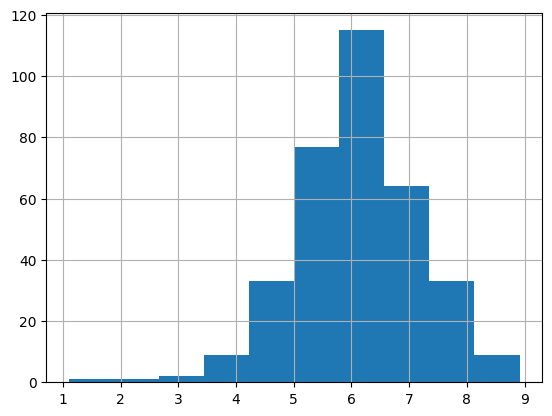

In [57]:
cont_cols_df.page_views.apply(np.log).hist()
cont_cols_df.page_views = cont_cols_df.page_views.apply(np.log)

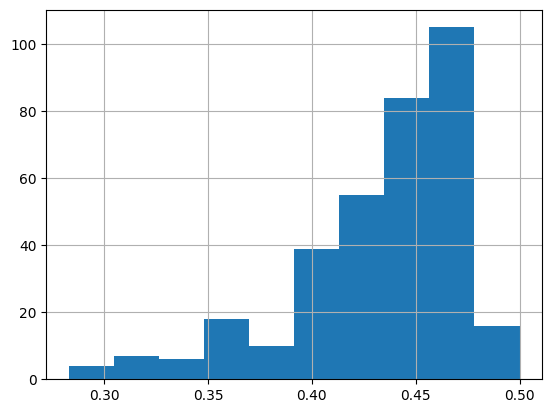

In [58]:
cont_cols_df.fpl_value.apply(lambda x : x**(-1/2)).hist()
cont_cols_df.fpl_value = cont_cols_df.fpl_value.apply(lambda x : x**(-1/2))

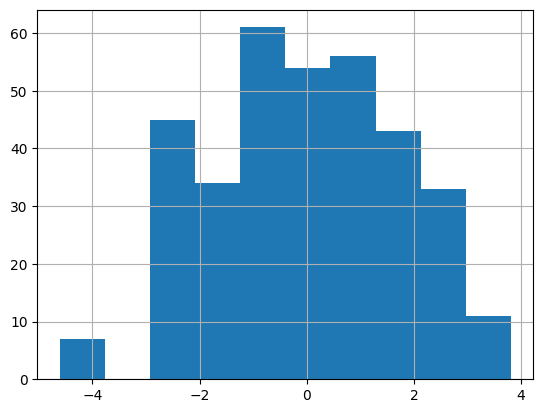

In [59]:
cont_cols_df.fpl_sel.apply(lambda x: np.log(x+0.01)).hist()
cont_cols_df.fpl_sel = cont_cols_df.fpl_sel.apply(lambda x: np.log(x+0.01))

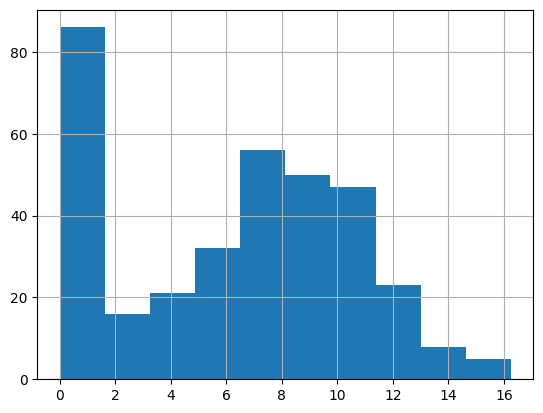

In [60]:
cont_cols_df.fpl_points.apply(lambda x : x**(1/2)).hist()
cont_cols_df.fpl_points = cont_cols_df.fpl_points.apply(lambda x : x**(1/2))

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scalar = MinMaxScaler()
cont_cols_scaled = scalar.fit_transform(cont_cols_df)

In [63]:
final_df[cont_cols_df.columns] = cont_cols_scaled

In [64]:
final_df.describe()

,market_value,page_views,fpl_value,fpl_sel,fpl_points,position_cat_1.0,position_cat_2.0,position_cat_3.0,position_cat_4.0,position_cat_others,...,new_signing_0.0,new_signing_1.0,new_signing_others,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_others
count,344.000000,344.000000,344.000000,344.000000,344.000000,461.000000,461.000000,461.000000,461.000000,461.0,...,461.000000,461.000000,461.0,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.0
mean,11.333430,0.639643,0.703789,0.548673,0.379542,0.247289,0.173536,0.251627,0.073753,0.0,...,0.639913,0.106291,0.0,0.108460,0.164859,0.325380,0.273319,0.069414,0.058568,0.0
std,12.735354,0.136876,0.199292,0.203217,0.267732,0.431905,0.379121,0.434419,0.261652,0.0,...,0.480547,0.308544,0.0,0.311298,0.371456,0.469025,0.446147,0.254433,0.235070,0.0
min,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,0.547657,0.661082,0.396648,0.101710,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,7.000000,0.643940,0.756921,0.559855,0.437359,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,15.000000,0.726720,0.868319,0.707983,0.597500,0.000000,0.000000,1.000000,0.000000,0.0,...,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [66]:
# Save dataset
s = json.dumps(list(all_columns))
with open('all_columns.json', 'w') as f:
    json.dump(s, f)

cat_col_dict = json.dumps(column_dict)
with open('cat_col_dict.json', 'w') as f:
    json.dump(cat_col_dict, f)
final_df.to_csv('/content/football_predict/futbolPrepared.csv', index=False)

In [70]:
# reading csv file
dframe = pd.read_csv("/content/football_predict/futbolPrepared.csv")
dframe.head()

,market_value,page_views,fpl_value,fpl_sel,fpl_points,position_cat_1.0,position_cat_2.0,position_cat_3.0,position_cat_4.0,position_cat_others,...,new_signing_0.0,new_signing_1.0,new_signing_others,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,age_cat_6,age_cat_others
0,1.0,0.534127,0.868319,0.488688,0.439525,0,0,1,0,0.0,...,1,0,0.0,0,0,0,0,0,1,0.0
1,15.0,0.642823,0.661082,0.588294,0.587109,0,1,0,0,0.0,...,1,0,0.0,0,0,0,1,0,0,0.0
2,30.0,0.803678,0.661082,0.790257,0.606155,0,1,0,0,0.0,...,1,0,0.0,0,0,1,0,0,0,0.0
3,0.5,0.427881,0.868319,0.285055,0.000000,1,0,0,0,0.0,...,1,0,0.0,0,1,0,0,0,0,0.0
4,20.0,0.762511,0.661082,0.408222,0.403582,0,1,0,0,0.0,...,0,1,0.0,0,0,1,0,0,0,0.0


<hr><hr>

# Load Fresh data

In [72]:
df = pd.read_csv('/content/football_predict/futbolPrepared.csv')
df.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'position_cat_1.0', 'position_cat_2.0', 'position_cat_3.0',
       'position_cat_4.0', 'position_cat_others',
       ...
       'new_signing_0.0', 'new_signing_1.0', 'new_signing_others', 'age_cat_1',
       'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5', 'age_cat_6',
       'age_cat_others'],
      dtype='object', length=108)

In [74]:
X, y = df.drop('market_value', axis=1), df['market_value']
print( "X = ", X)
print("y= ",y )

X =       page_views  fpl_value   fpl_sel  fpl_points  position_cat_1.0  \
0      0.534127   0.868319  0.488688    0.439525                 0   
1      0.642823   0.661082  0.588294    0.587109                 0   
2      0.803678   0.661082  0.790257    0.606155                 0   
3      0.427881   0.868319  0.285055    0.000000                 1   
4      0.762511   0.661082  0.408222    0.403582                 0   
..          ...        ...       ...         ...               ...   
456         NaN        NaN       NaN         NaN                 0   
457         NaN        NaN       NaN         NaN                 0   
458         NaN        NaN       NaN         NaN                 0   
459         NaN        NaN       NaN         NaN                 0   
460         NaN        NaN       NaN         NaN                 0   

     position_cat_2.0  position_cat_3.0  position_cat_4.0  \
0                   0                 1                 0   
1                   1           

<hr><hr>

# Nearest Neighbors Algorithm

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

In [85]:
def kfold_verify(X, y, model):
    kfcv = KFold(shuffle=True)
    cv_scores = cross_validate(model, X, y, cv=kfcv, scoring='neg_root_mean_squared_error' )
    print("test_score =", np.mean(cv_scores['test_score']))
    return -(np.mean(cv_scores['test_score']))         # Lower is better

In [86]:
def eval_weights(weight_arr, X, y):
    """
    Parameters:-
    weight_arr: 1D array, indicating the weights for each attributes
    Returns:-
    The cross-validation error rate for given weights
    """
    model = KNeighborsRegressor(10, metric='wminkowski', metric_params={'w':weight_arr})
    return kfold_verify(X, y, model)

## Optimize weights using Genetic Algorithm

In [87]:
class GA(object):
    # Genetic Algorithm to maximize the accuracy by finding optimal attribute weights
    def __init__(self, pop_size, num_parents, num_offspring):
        """
        Parameters:-
        pop_size : tuple, indicating the size of population and the number of genes in one chromosome
        num_parents: int, indicating the number of parents to be chosen for crossover
        num_offspring: int, indicating the number of offsprings to be produced for next generation
        """
        self.pop_size = pop_size
        self.np = num_parents
        self.no = num_offspring

    def initialize(self, X, y):
        self.X = X
        self.y = y
        self.pop = np.random.uniform(5, size=self.pop_size)

    def calc_fitness(self, eval_func):
        """
        Parameters:-
        eval_func: callable, outputs the score of a chromosome. This score needs to be maximised/minimised
        """
        fitness = np.zeros(self.pop.shape[0])
        for i in range(self.pop.shape[0]):
            fitness[i] = eval_func(self.pop[i,:], self.X, self.y)
        return fitness
    def get_parents(self, fitness):
        """
        Parameters:-
        fitness: array, indicating the fitness score for each chromosome
        """
        sorted_fitness = np.argsort(fitness)
        self.parents = np.empty((self.np, self.pop_size[1]))
        for i in range(self.np):
            self.parents[i] = self.pop[sorted_fitness[i],:]

        return self.parents

    def crossover(self):
        cross_point = self.pop_size[1] // 2
        # create pair of parents to produce offspring
        candidates = itertools.product(range(self.parents.shape[0]), repeat=2)
        self.offspring = np.empty((self.no, self.pop_size[1]))
        count = 1
        for i in candidates:
            if i[0] != i[1]:
                p1 = self.parents[i[0],:]
                p2 = self.parents[i[1],:]
                self.offspring[count-1, :cross_point] = p1[:cross_point]
                self.offspring[count-1, cross_point:] = p2[cross_point:]
                count += 1

            if count == self.no:
                break

        return self.offspring

    def get_optimal_genes(self, eval_func):
        fitness = self.calc_fitness(eval_func)
        sorted_fit = np.argsort(fitness)
        return self.pop[sorted_fit[0], :]

    def next_gen(self):
        self.pop = np.empty((self.np+self.no, self.pop_size[1]))
        self.pop[:self.np, :] = self.parents
        self.pop[self.np:, :] = self.offspring
        self.pop_size = self.pop.shape

In [88]:
pop_size = (100, X.shape[1])
genetic_obj = GA(pop_size, 10, 50)

In [89]:
genetic_obj.initialize(X, y)

In [ ]:
epochs = 10
for i in range(epochs):
    fit_score = genetic_obj.calc_fitness(eval_weights)
    next_gen_parents = genetic_obj.get_parents(fit_score)
    next_gen = genetic_obj.crossover()
    genetic_obj.next_gen()

In [ ]:
final_attr_weights = genetic_obj.get_optimal_genes(eval_weights)

<hr><hr>


# Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor()
kfold_verify(X,y,rf)

NameError: ignored